# Лабораторная работа 2.
## Часть 1 - метод дихотомии, метод Ньютона.

1. Реализовать функции для метода дихотомии и метода Ньютона.
2. Сделать ползунок для перебора значений входных параметров.
3. Сделать вывод 6 кадров нахождения решения и оформить их через массив графиков.
4. Сравнить полученный результат с функцией solve().

Функция: $y=x^3-9x^2+23x-15$

In [1]:
y(x) = x**3 - 9 * x**2 + 23 * x - 15

In [2]:
show(y(x))

x^3 - 9*x^2 + 23*x - 15

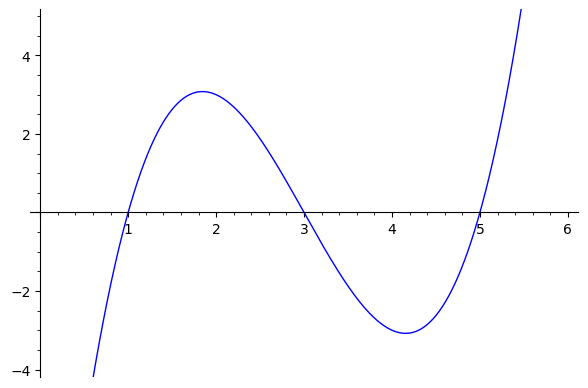

In [3]:
plot(y, (x, 0, 6), ymin=-4, ymax=5)

### Метод дихотомии.

In [4]:
def diсhotomy(func, left, right, eps=1e-15, visualization=False):
    '''
    func - функция, к которой применяем метод дихотомии
    left, right - границы интервала поиска решения
    eps - точность
    visualization - нужна ли визуализация?
    
    Возвращает: n(left) - численное решение уравнения func=0
                (n(left), plots_array) - решение уравнения и массив графиков для визуализации (если visualization == True)
    '''
    
    func_plot = plot(y, (x, 0, 6), ymin=-4, ymax=5) # график функции
    plots_array = [] # массив графиков для визуализации
    
    while abs(right - left) > eps:
        mid = (left + right) / 2
        if func(x=left) * func(x=mid) > 0:
            left = mid
        elif func(x=right) * func(x=right) > 0:
            right = mid
        
        if visualization:
            plots_array.append(((point((mid, func(mid)), color="red", size=100)) + func_plot)
                + text((r"$x={}, y={}$").format(mid, func(mid)), (2, -5), fontsize=14, color="black"))
        
    if visualization:
        # добавим график с результатом
        plots_array.append(((point((left, func(left)), color="red", size=100)) + func_plot)
                + text((r"$x={}, y={}$").format(left, func(left)), (2, -5), fontsize=14, color="black"))
        return (n(left), plots_array)
    else:
        return n(left)

Проверим работу функции на следующих интервалах:
1. $[-1; 2.5]$
2. $[2,5; 4]$
3. $[4; 6]$

In [5]:
diсhotomy(y, -1, 2.5)

1.00000000000000

In [6]:
diсhotomy(y, 2.5, 4)

3.00000000000000

In [7]:
diсhotomy(y, 4, 6)

5.00000000000000

### Визуализация метода дихотомии.

Сгенерируем массив графиков для визуализации. Функция будет выводить столько графиков, сколько было совершено итераций при поиске ответа.

*Примечания:*
1. *graphics_array требует, чтобы количество графиков в строке было одинаковым, поэтому в случае нечетного количества графиков будем выводить последний два раза.*
2. *Так как количество итераций может быть довольно большим, точность искомого результата на графиках снижена. Это ускорит работу функции и не повлияет на визуализацию.*

In [8]:
@interact
def diсhotomy_interactive(left=(-1, 6, 0.5), right=(-1, 6, 0.5)):
    result, plots = diсhotomy(y, left, right, eps=1e-1, visualization=True)
    print('ANSWER:', result)
    graphics_array([[plots[i], plots[i + 1]] if i + 1 < len(plots) else [plots[i], plots[i]] for i in range(0, len(plots), 2)]).show(figsize=15)

Interactive function <function diсhotomy_interactive at 0x6fff444dbef0> with 2 widgets
  left: FloatSlider(val…

### Метод Ньютона.

In [9]:
def newton(func, left, right, eps=1e-15, visualization=False):
    '''
    func - функция, к которой применяем метод Ньютона
    left, right - границы интервала поиска решения
    eps - точность
    visualization - нужна ли визуализация?
    
    Возвращает: next - численное решение уравнения func=0
                (next, plots_array) - решение уравнения и массив графиков для визуализации (если visualization == True)
    '''
    
    func_plot = plot(y, (x, 0, 6), ymin=-4, ymax=5) # график функции
    plots_array = [] # массив графиков для визуализации
    
    df = func.derivative()
    cur = left
    next = (left + right) / 2
    
    while abs(next - cur) > eps:
        if visualization:
            tangent = func(x=cur) + df(x=cur) * (x - cur) # уравнение касательной в точке
            plots_array.append(((plot(tangent, (x, 0, 6), ymin=-9, ymax=5, color="red")) + func_plot)
                               + text((r"$y={}$" + "\n" + r"$cur={}, next={}$").format(latex(tangent), cur, next), (2, -5), fontsize=14, color="black"))
        
        cur = next
        next = cur - func(x=cur) / df(x=cur)
    
    if visualization:
        # добавим график с результатом
        tangent = func(x=cur) + df(x=cur) * (x - cur)
        plots_array.append(((plot(tangent, (x, 0, 6), ymin=-9, ymax=5, color="red")) + func_plot)
                               + text((r"$y={}$" + "\n" + r"$cur={}, next={}$").format(latex(tangent), cur, next), (2, -5), fontsize=14, color="black"))
        return (next, plots_array)
    else:
        return next    

Проверим работу функции на тех же интервалах.

In [10]:
newton(y, -1, 2.5)

1.00000000000000

In [11]:
newton(y, 2.5, 4)

3.00000000000000

In [12]:
newton(y, 4, 6)

5

### Визуализация метода Ньютона.

Сгенерируем массив графиков для визуализации. Функция будет выводить столько графиков, сколько было совершено итераций при поиске ответа.

*Примечания:*
1. *graphics_array требует, чтобы количество графиков в строке было одинаковым, поэтому в случае нечетного количества графиков будем выводить последний два раза.*
2. *Так как количество итераций может быть довольно большим, точность искомого результата на графиках снижена. Это ускорит работу функции и не повлияет на визуализацию.*

In [13]:
@interact
def newton_interactive(left=(-1, 6, 0.5), right=(-1, 6, 0.5)):
    result, plots = newton(y, left, right, eps=1e-2, visualization=True)
    print('ANSWER:', result)
    graphics_array([[plots[i], plots[i + 1]] if i + 1 < len(plots) else [plots[i], plots[i]] for i in range(0, len(plots), 2)]).show(figsize=15)

Interactive function <function newton_interactive at 0x6fff3fcc6d40> with 2 widgets
  left: FloatSlider(value=…

Сравним полученные результаты с результатом функции solve().

In [14]:
solve(y, x)

[x == 1, x == 5, x == 3]

Результаты совпали. Все функции реализованы корректно.

## Часть 2 - полиномы, НОД.

1. Реализовать расширенный алгоритм Евклида.
2. Рассчитать НОД, сравнить его с результатом функции gcd().
3. Получить представление НОД в виде $u * f + v * g$ (тождество Безу).

Вариант 1.  
$f = x^4 - 4x^3 + 7x^2 - 5x + 1$  
$g = x^5 - x^4 - x^3 + x^2 + 5x - 5$

In [15]:
R.<x> = PolynomialRing(QQ) # Будем работать в кольце рациональных чисел
f = x**4 - 4*x**3 + 7*x**2 - 5*x + 1
g = x**5 - x**4 - x**3 + x**2 + 5*x - 5

In [16]:
show(f)

x^4 - 4*x^3 + 7*x^2 - 5*x + 1

In [17]:
show(g)

x^5 - x^4 - x^3 + x^2 + 5*x - 5

Для начала рассчитаем НОД при помощи встроенной функции gcd().

In [18]:
gcd_auto = gcd(f, g)
show(gcd_auto)

x - 1

### Расширенный алгоритм Евклида. Тождество Безу.

In [19]:
def ext_euclid(f, g):
    '''
    f,g - полиномы
    
    Функция возвращает тройку чисел (gcd, u, v):
    gcd - НОД полиномов f и g
    u, v - коэффициенты в разложении Безу
    '''
    u, uu, v, vv = 1, 0, 0, 1
    while g != 0:
        quotient = f // g
        remainder = f % g
        q = quotient
        f, g = g, remainder
        u, uu = uu, u - uu*q
        v, vv = vv, v - vv*q
    return (f, u, v) 

In [20]:
gcd_euclid, u, v = ext_euclid(f, g)
show("GCD = ", gcd_euclid(x))
show("u = ", u(x))
show("v = ", v(x))

'GCD = ' 1936/441*x - 1936/441

'u = ' -16/21*x^3 - 128/441*x^2 + 656/441*x + 1264/441

'v = ' 16/21*x^2 - 880/441*x + 640/441

Нормируем полученные многочлены для последующей работы с ними: домножим все выражения на $\large{\frac{441}{1936}}$.

In [21]:
gcd_euclid_norm = gcd_euclid * 441/1936
u_norm = u * 441/1936
v_norm = v * 441/1936
show("GCD = ", gcd_euclid_norm(x))
show("u = ", u_norm(x))
show("v = ", v_norm(x))

'GCD = ' x - 1

'u = ' -21/121*x^3 - 8/121*x^2 + 41/121*x + 79/121

'v = ' 21/121*x^2 - 5/11*x + 40/121

Результат, полученный при помощи алгоритма Евклида, совпал с результатом, полученным с помощью функции gcd(). Следовательно НОД полиномов $f$ и $g$ равен $x-1$.

При помощи расширенного алгоритма Евклида вычислили коэффициенты в разложении Безу. Проверим корректность найденных коэффициентов.

In [22]:
u_norm * f + v_norm * g

x - 1

Полученный результат совпал с НОД, значит найденные коэффициенты верны. Алгоритм работает корректно.